# Regression
## Regression with Linear Models

We will be fitting some data according to a straight line model (linear line). For case study, we will be using some specimen data of hours of study and student test scores. The data is in data.csv. Firstly, all the libraries and data will be loaded.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

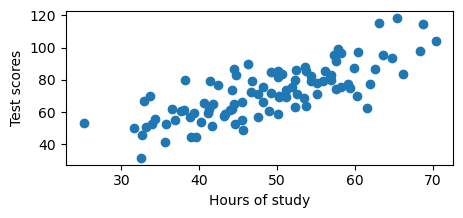

In [ ]:
points = np.genfromtxt('data.csv', delimiter=',')

x = points[:,0]
y = points[:,1]

plt.figure(figsize=(5,2))
plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.show()

**Parameters & Governing Model**

The model is given by the expression:

$y = mx + b$

where $x$ is the input, and $y$ is the output, $m$ is the slop, and $b$ is the intercept. This can also be re-written as:

$h(x) = w_1 x + w_0$

Now, $w_0$ and $w_1$ are unknown co-efficients whose values need to be determined. But essentially, these co-efficients bear some meaning. $w_1$ has a multiplicative or dividing effect on input $x$, whereas $w_0$ is an additive term. The task of finding $h(x)$ that best fits the data is linear regression. To find this best fit, we need to estimate the pair $\left[ w_0, w_1 \right]$ that minimizes the loss.


**Loss**

If $y$ is the original value and $h(x)$ is an estimated value, then we can determine the loss $L$ with the expression:

$L\left(y, h(x)\right) = \left(y - h(x)\right)^2$

Some variations to this exist (more about this later). We could use $\left(y - h(x)\right)$ as just error, or $\left| y - h(x)\right|$ as absolute error, or $\sqrt{\left(y - h(x)\right)^2}$ as root squared error. If multiple values are involved, then the total loss or total cost would be:

$\displaystyle \dfrac{1}{N} \sum_{j=1}^{N-1} \left(y_j - h(x_j)\right)^2$

which could be expanded to:

$\displaystyle \dfrac{1}{N} \sum_{j=1}^{N-1} \left(y_j - \left(w_1 x_j + w_0\right)\right)^2$

**Gradient Descent**

As an example to understand gradient descent, we look at a differential equation of population growth:

$\displaystyle \dfrac{dP}{dt} = rP$

where $p$ is population size, $r$ is growth rate, and $t$ is time. We can re-write the derivative term as a difference, provided the change in time $\Delta t = t_{new} - t_{old}$ is quite small.

$\displaystyle \dfrac{dP}{dt} = \lim_{\Delta t \rightarrow 0} \dfrac{P_{new} - P_{old}}{t_{new}-t_{old}} = rP_{old}$

Ignoring the limit term, and rewriting, we have:

$\displaystyle P_{new} = P_{old} + \Delta t ~ r P_{old} $

Here, $r P$ is the original derivative term so essentially we have:

$\displaystyle P_{new} = P_{old} + \Delta t \dfrac{dP}{dt}$

which is the base model for gradient descent, and can be calculated multiple times to get new $P$ values from previous $P$'s.

**Derivative of Loss Term**

$\displaystyle \dfrac{\partial}{\partial w_{0}} \left(y - \left(w_1 x + w_0\right)\right)^2 = 2 \left(y - \left(w_1 x + w_0\right)\right) \dfrac{\partial}{\partial w_{0}} \left(y - \left(w_1 x + w_0\right)\right) = 2 \left(y - \left(w_1 x + w_0\right)\right) $

$\displaystyle \dfrac{\partial}{\partial w_{1}} \left(y - \left(w_1 x + w_0\right)\right)^2 = 2 \left(y - \left(w_1 x + w_0\right)\right) \dfrac{\partial}{\partial w_{1}} \left(y - \left(w_1 x + w_0\right)\right) = 2 \left(y - \left(w_1 x + w_0\right)\right) x$

This means that if we are determining change in $w_1$ and $w_0$, we can update the loss term using gradient descent as:

$w_1 = w_1 + \Delta x 2 (y - (w_1 x + w_0)) x$

$w_0 = w_0 + \Delta x 2 (y - (w_1 x + w_0))$

Here, a question could be what is the starting most value of $w_0$ and $w_1$? Well it could be started with 0 for all that matters, in this case at least. This would be called a boundary condition. In other fitting models, a starting value of 0 may not be quite good.

**Putting All Together**

We now place all these concepts together. First, some parameters.

Our $\Delta t$ or $\Delta x$ we now call as the Learning Rate, $w_0$ we call as b, $w_1$ we call as m.

In [ ]:
learning_rate = 0.0001
b = 0
m = 0
num_iterations = 5

Optimized b: 0.014547010110737297
Optimized m: 0.7370702973591052


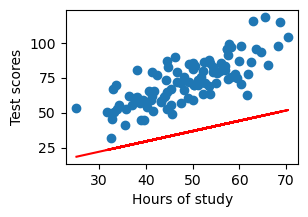

Optimized b: 0.02187396295959641
Optimized m: 1.1067954543515157


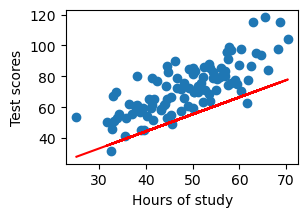

Optimized b: 0.025579224321293136
Optimized m: 1.2922546649131115


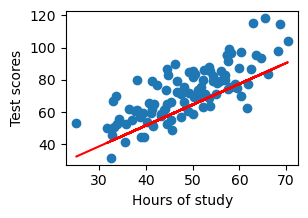

Optimized b: 0.027467789559144355
Optimized m: 1.385283255651245


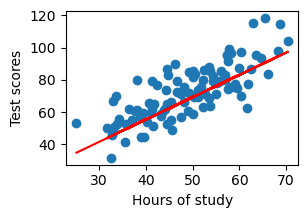

Optimized b: 0.028445071981738963
Optimized m: 1.4319472323843205


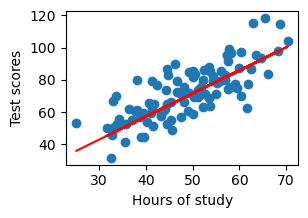

In [ ]:
cost_graph = []

for i in range(num_iterations):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))
    total_cost = 0

    for j in range(0, len(points)):
        x_j = points[j, 0]
        y_j = points[j, 1]
        m_gradient += (2/N) * x_j * (y_j - (m * x_j + b))
        b_gradient += (2/N) *       (y_j - (m * x_j + b))
        total_cost +=   (y_j - (m * x_j + b)) ** 2

    cost_graph.append(total_cost/N)

    m = m + learning_rate * m_gradient
    b = b + learning_rate * b_gradient

    print ('Optimized b:', b)
    print ('Optimized m:', m)
    plt.figure(figsize=(3,2))
    plt.scatter(x, y)
    pred = m * x + b
    plt.plot(x, pred, c='r')
    plt.xlabel('Hours of study')
    plt.ylabel('Test scores')
    plt.show()

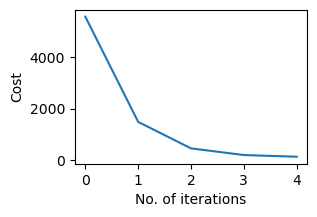

In [ ]:
plt.figure(figsize=(3,2))
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.show()

## Regression with Polynomial Models

**Parameters & Governing Model**

This is a higher order model and is given by the expression:

$h(x) = w_0 + w_1 x + w_2 x^2$

Now, $w_0, w_1, and w_2$ are unknown co-efficients whose values need to be determined. Here also, these co-efficients bear some meaning. $w_1, w_2$ have a multiplicative or dividing effect on input $x$, whereas $w_0$ is the same additive term as before. The task of finding $h(x)$ that best fits the data according to this model is now polynomial regression. To find this best fit, we need to estimate the pair $\left[ w_0, w_1, w_2 \right]$ that minimizes the loss.


**Derivative of Loss Term**

$\displaystyle \dfrac{\partial}{\partial w_{0}} \left(y - \left(w_0 + w_1 x + w_2 x^2 \right)\right)^2 = 2 \left(y - \left(w_0 + w_1 x + w_2 x^2 \right)\right) \dfrac{\partial}{\partial w_{0}} \left(y - \left(w_0 + w_1 x + w_2 x^2\right)\right) = 2 \left(y - \left(w_0 + w_1 x + w_2 x^2\right)\right) $

$\displaystyle \dfrac{\partial}{\partial w_{1}} \left(y - \left(w_0 + w_1 x + w_2 x^2 \right)\right)^2 = 2 \left(y - \left(w_0 + w_1 x + w_2 x^2 \right)\right) \dfrac{\partial}{\partial w_{1}} \left(y - \left(w_0 + w_1 x + w_2 x^2\right)\right) = 2 \left(y - \left(w_0 + w_1 x + w_2 x^2\right)\right) x$

$\displaystyle \dfrac{\partial}{\partial w_{2}} \left(y - \left(w_0 + w_1 x + w_2 x^2 \right)\right)^2 = 2 \left(y - \left(w_0 + w_1 x + w_2 x^2 \right)\right) \dfrac{\partial}{\partial w_{2}} \left(y - \left(w_0 + w_1 x + w_2 x^2\right)\right) = 2 \left(y - \left(w_0 + w_1 x + w_2 x^2\right)\right) x^2$

This means that if we are determining change in $w_1$ and $w_0$, we can update the loss term using gradient descent as:

$w_0 = w_0 + \Delta x 2 (y - (w_0 + w_1 x + w_2 x^2))$

$w_1 = w_1 + \Delta x 2 (y - (w_0 + w_1 x + w_2 x^2)) x$

$w_2 = w_2 + \Delta x 2 (y - (w_0 + w_1 x + w_2 x^2)) x^2$




**Putting All Together**

We now place all these concepts together. First, some parameters.

Our $\Delta t$ or $\Delta x$ we now call as the Learning Rate. For the co-efficients, we can experiment with 0 starting value. Later, when you see how to make a good initial guess, you can modify the 0 starting values to c[0], c[1], and c[2].

In [ ]:
learning_rate = 0.0000001
c0 = 0#c[0]
c1 = 0#c[1]
c2 = 0#c[2]
num_iterations = 5

Optimized c0: 1.4547010110737295e-05
Optimized c1: 0.0007370702973591052
Optimized c2: 0.03869638333845775


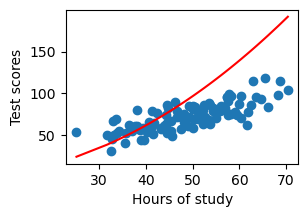

Optimized c0: 9.80856235344022e-06
Optimized c1: 0.00045880280885258844
Optimized c2: 0.022304822456207


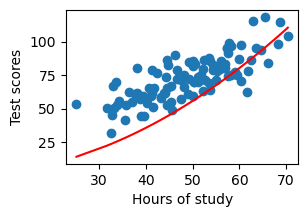

Optimized c0: 1.3238988644002584e-05
Optimized c1: 0.0006106095195159898
Optimized c2: 0.029247300230810083


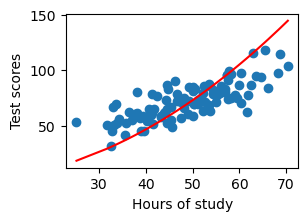

Optimized c0: 1.3209239269006892e-05
Optimized c1: 0.0005802457795038716
Optimized c2: 0.02630599368533948


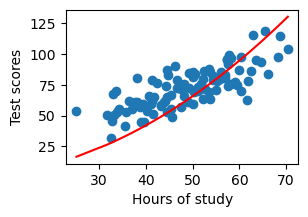

Optimized c0: 1.4645123301622269e-05
Optimized c1: 0.0006270449243360779
Optimized c2: 0.02755124027924476


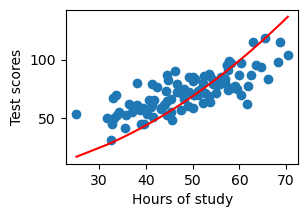

In [ ]:
cost_graph = []

for i in range(num_iterations):
    c0_gradient = 0
    c1_gradient = 0
    c2_gradient = 0
    N = float(len(points))
    total_cost = 0

    for j in range(0, len(points)):
        x_j = points[j, 0]
        y_j = points[j, 1]
        c0_gradient += (2/N) *          (y_j - (c0 + c1 * x_j + c2 * x_j**2))
        c1_gradient += (2/N) * x_j    * (y_j - (c0 + c1 * x_j + c2 * x_j**2))
        c2_gradient += (2/N) * x_j**2 * (y_j - (c0 + c1 * x_j + c2 * x_j**2))
        total_cost  +=                  (y_j - (c0 + c1 * x_j + c2 * x_j**2)) ** 2

    cost_graph.append(total_cost/N)

    c0 = c0 + learning_rate * c0_gradient
    c1 = c1 + learning_rate * c1_gradient
    c2 = c2 + learning_rate * c2_gradient

    print ('Optimized c0:', c0)
    print ('Optimized c1:', c1)
    print ('Optimized c2:', c2)
    plt.figure(figsize=(3,2))
    plt.scatter(x, y)
    x_new = x[np.argsort(x)]
    pred = c0 + c1 * x_new + c2 * x_new**2
    plt.plot(x_new, pred, c='r')
    plt.xlabel('Hours of study')
    plt.ylabel('Test scores')
    plt.show()

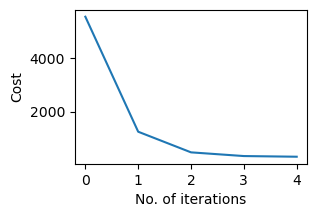

In [ ]:
plt.figure(figsize=(3,2))
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.show()

**Analysis**

Inspect the cost / total loss and see that its convergence is not quickly going down to zero and you have to keep the learning rate very very small. Adjust the learning rate and increase the number of iterations. One reason is that our initial guess for the co-efficients was 0. It could be something better. In the following, we determine this good initial guess by the method of least squares.

**Least Squares Based Initial Guess**

In [ ]:
pn = 2

A = np.zeros((pn+1, pn+1))
b = np.zeros((pn+1, 1))
for i in range(pn+1):
    for j in range(pn+1):
        A[i,j] = np.sum(x**(i+j))
    b[i] = np.sum(x**i*y)

In [ ]:
c = np.dot(np.linalg.inv(A), b)

**Directly Plugging in co-efficients of least squares into Polynomial Regression**

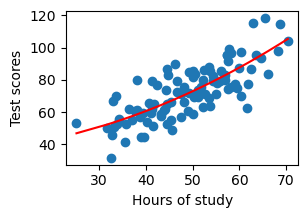

In [ ]:
plt.figure(figsize=(3,2))
plt.scatter(x, y)

x_new = x[np.argsort(x)]

pred = c[0] + c[1] * x_new + c[2] * x_new**(2)

plt.plot(x_new, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.show()